<a href="https://colab.research.google.com/github/SDPreetham/Walmart_Case_Study/blob/main/Walmart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Walmart Case Study**
\- By S D Preetham

### **Problem Statement:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:


*   User_ID:	User ID
*   Product_ID:	Product ID
* Gender:	Sex of User
* Age:	Age in bins
* Occupation:	Occupation(Masked)
* City_Category:	Category of the City (A,B,C)
* Stay_In_Current_City_Years:	Number of years stay in current city
* Marital_Status:	Marital Status
* Product_Category:	Product Category (Masked)
* Purchase:	Purchase Amount





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Non-Graphical Analysis: Analyzing basic metrics

In [ ]:
df.shape

(550068, 10)

There are a total of 550068 rows and 10 columns.

In [ ]:
# Getting a statistical summary of features of the dataset.
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# Analyzing the data types of the features.
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
# Checking the number of unique values for each feature
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [ ]:
# Checking for missing data (null values).
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


**Insight:**
 It is observed that there are no null values. Hence, there is no need for any imputation in the dataset.

### **Visual Analysis:**
 **Visualizing the numerical data using Box-plots:**

In [ ]:
# Determining Numerical Features
numeric_df = df.select_dtypes(include=["number"])


In [ ]:
numeric_df = numeric_df.drop(['User_ID'], axis = 1, errors = 'ignore')

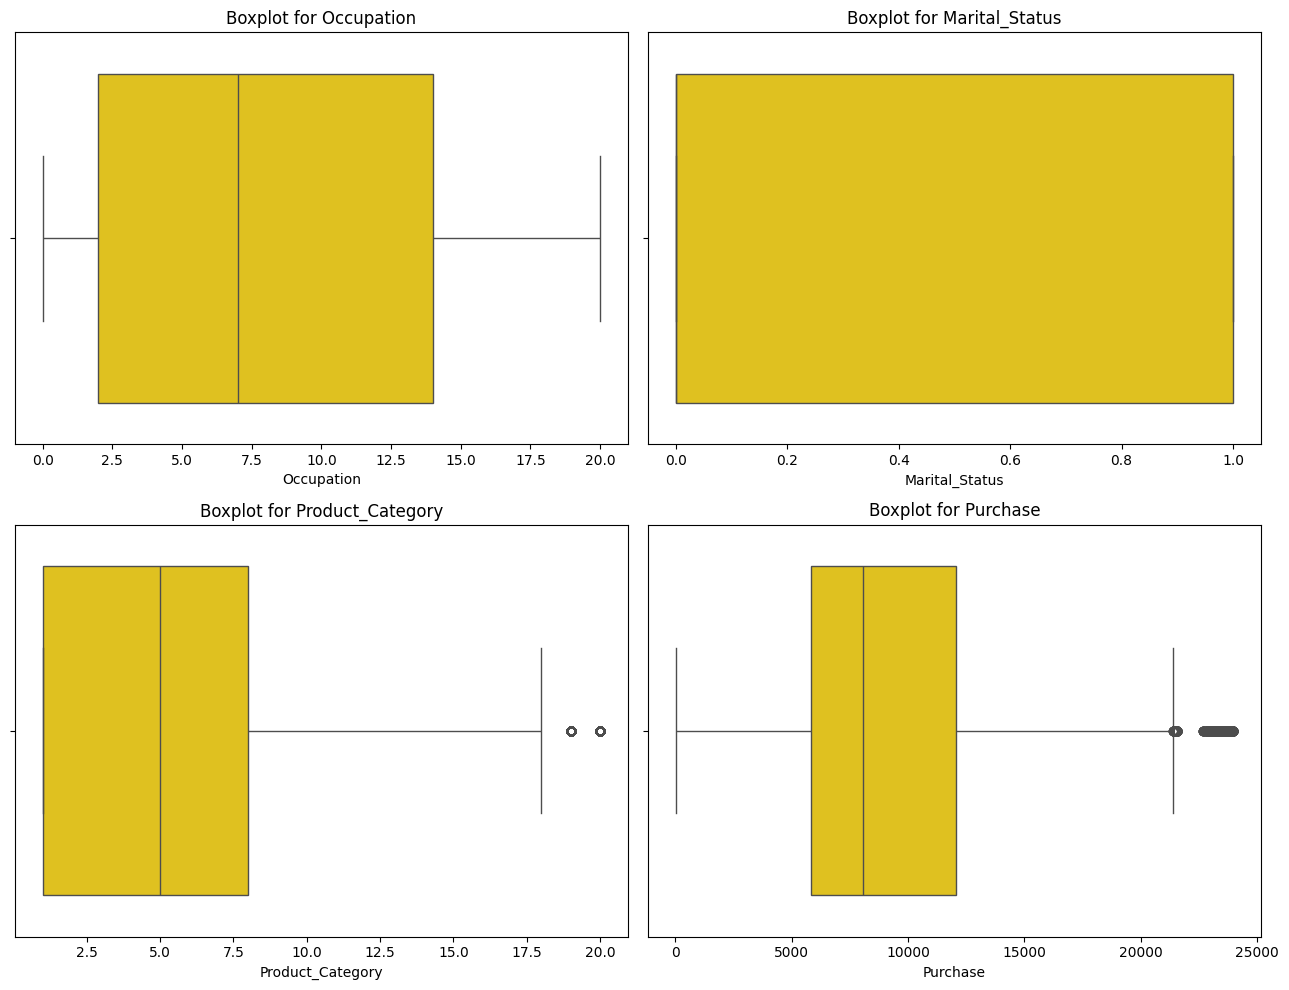

In [ ]:
# Ensure max 4 plots
rows, cols = 2, 2
plt.figure(figsize=(13, 10))

# Get first 4 numeric columns to avoid ValueError
numeric_columns = numeric_df.columns[:4]  # Select only the first 4 columns

# Plot each numeric column in a 2×2 grid
for i, col in enumerate(numeric_columns, 1):  # Take only first 4 columns
    plt.subplot(2, 2, i)
    sns.boxplot(x=numeric_df[col], color="gold")
    plt.title(f"Boxplot for {col}")

plt.tight_layout()  # To adjust layout and prevent overlap
plt.show()

**Insight:**


*  It is observed that there are significant number of outliers in purchases.




In [ ]:
# Fetching the count of male and female customers
gender_counts = df['Gender'].value_counts()
gender_counts

,count
Gender,
M,414259
F,135809


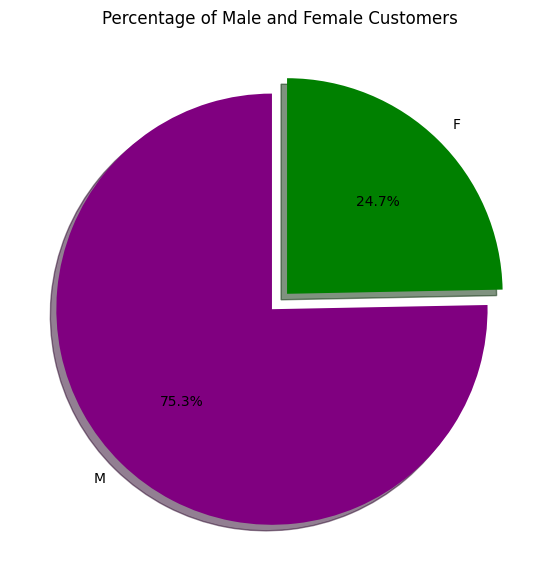

In [ ]:
# Creating a pie chart for visualizing Male vs Female customers
labels = gender_counts.index  # 'M' and 'F'
colors = ['purple', 'green']
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=[0.05, 0.05], shadow=True)
plt.title('Percentage of Male and Female Customers')
plt.show()


**Insight:**

*   It is observed that Walmart has a significantly higher number of male customers than female customers.




In [ ]:
# Tracking the amount spent per transaction of all the 50 million female customers and 50 million male customers

gender_spend = df.groupby('Gender')['Purchase'].sum()
print('Total income from male vs female customers:',gender_spend)
print('\n')
avg_gender_spend = df.groupby('Gender')['Purchase'].mean()
print('Average expenses for male vs female customers:',avg_gender_spend)

Total income from male vs female customers: Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64


Average expenses for male vs female customers: Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


**Insight:**

*  It is observed that the average amount spent by male customers surpasses that of female customers.




###  **Estimating the Confidence Interval**


*   Using the sample average to find out an interval within which the population average (i.e. average spending for 50 million male and female customers each) will lie.
*   Using various samples of customers, we calculate of the interval within which the average spending of 50 million male customers and 50 million female customers may lie.






#### **For 95 % Confidence Level**

In [ ]:
from scipy.stats import norm

female_purchases = df[df['Gender']=='F']['Purchase']
male_purchases = df[df['Gender']=='M']['Purchase']

female_avg = female_purchases.mean()
male_avg = male_purchases.mean()
overall_avg = df['Purchase'].mean()

# Computing standard deviation and standard error
female_std = female_purchases.std()
male_std = male_purchases.std()
overall_std = df['Purchase'].std()

female_se = female_std / np.sqrt(len(female_purchases))
male_se = male_std / np.sqrt(len(male_purchases))
overall_se = overall_std / np.sqrt(len(df))

# Define confidence level
confidence_level = 0.95

# Compute Z-critical value dynamically
z_95 = np.round(norm.ppf((1 + confidence_level) / 2),2)
z_95

1.96

In [ ]:
ci_female = (female_avg - z_95 * female_se,female_avg + z_95 * female_se)
ci_male = (male_avg - z_95* male_se, male_avg + z_95 * male_se)
ci_overall = (overall_avg- z_95*overall_se, overall_avg+z_95*overall_se)

print("95% Confidence Interval for average spending of Female Customers:", np.round(ci_female,2))
print("95% Confidence Interval for average spending of Male Customers:", np.round(ci_male,2))
print('95% Confidence Interval for average spending of all the customers', np.round(ci_overall,2))

95% Confidence Interval for average spending of Female Customers: [8709.21 8759.92]
95% Confidence Interval for average spending of Male Customers: [9422.02 9453.03]
95% Confidence Interval for average spending of all the customers [9250.69 9277.24]


**Insights:**

*   It is observed that for a population of 50 million male customers, the average purchase amount would be present in a range of 9422.02 - 9453.03.
*   In case of 50 million female customers, the average purchase amount would be between 8701.21 - 8759.92.
* Overall, for a population size of 100 million customers, the average spending for a customer would range in between 9250.69 - 9277.24.
*  The confidence intervals for male and female customers do not overlap, indicate that different strategies have to be adopted to maximize the income.



#### **For 99% Confidence Level**

In [ ]:
confidence_level = 0.99
z_99 = np.round(norm.ppf((1 + confidence_level) / 2),2)
z_99

2.58

In [ ]:
ci_female = (female_avg - z_99 * female_se,female_avg + z_99 * female_se)
ci_male = (male_avg - z_99 * male_se, male_avg + z_99 * male_se)
ci_overall = (overall_avg- z_99*overall_se, overall_avg+z_99*overall_se)
print("99% Confidence Interval for average spending of Female Customers:", np.round(ci_female,2))
print("99% Confidence Interval for average spending of Male Customers:", np.round(ci_male,2))
print('99% Confidence Interval for average spending of all the customers', np.round(ci_overall,2))

99% Confidence Interval for average spending of Female Customers: [8701.19 8767.94]
99% Confidence Interval for average spending of Male Customers: [9417.11 9457.94]
99% Confidence Interval for average spending of all the customers [9246.5  9281.44]


**Insight:**
*   It is observed that for a population of 50 million male customers, the average purchase amount would be present in a range of 9417.11 - 9457.94.
*   In case of female customers, the average purchase amount would be between 8701.19 - 8767.94.
* Overall, for a population size of 100 million customers, the average amount spent would range in between 9246.5 - 9281.44
*   It has been observed that the confidence intervals for purchases by male and female customers do not overlap, for both 95% and 99% confidence intervals.

* As the confidence intervals for male and female customers do not overlap, different strategies have to be adopted to maximize the income.




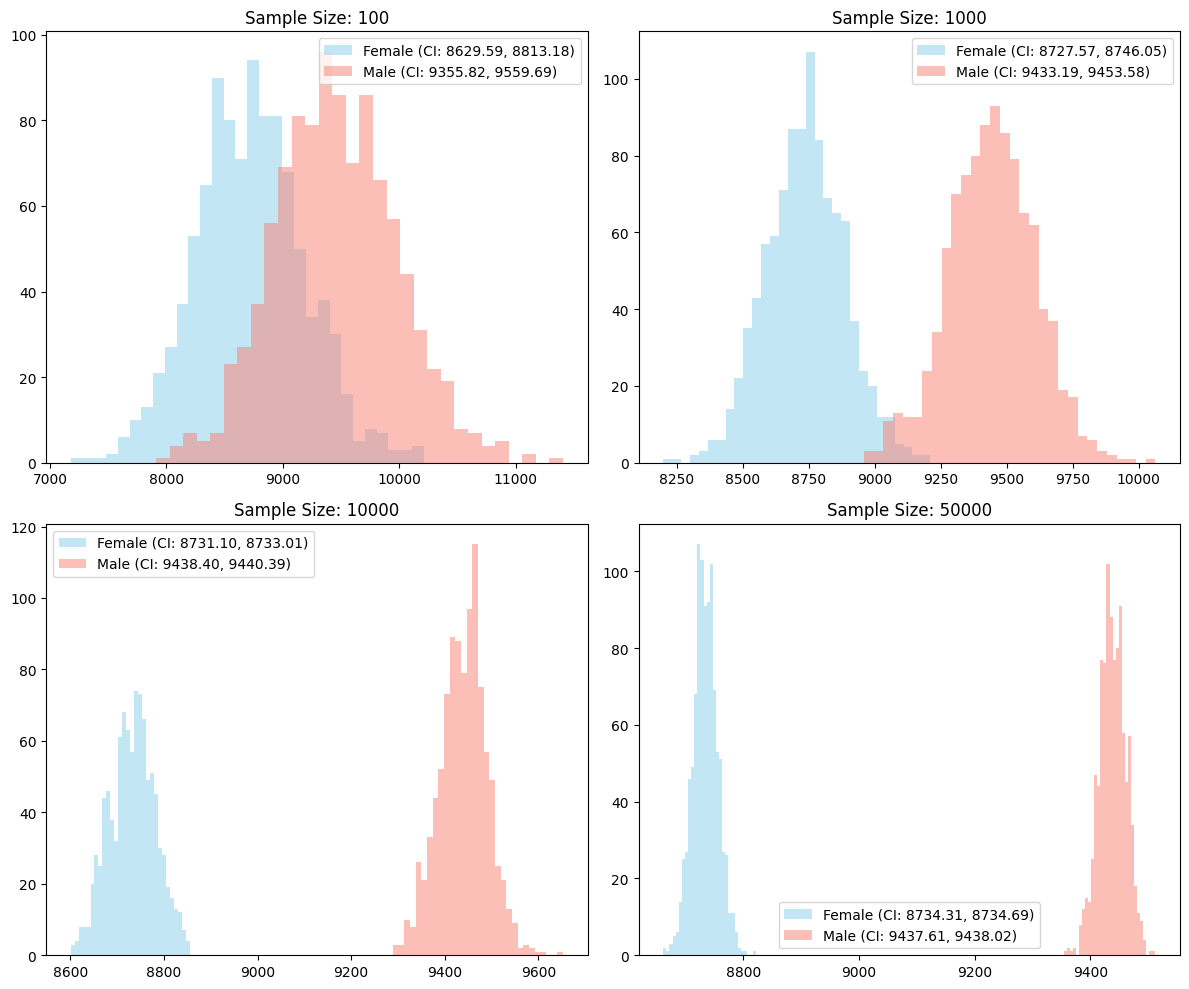

In [ ]:
# Function to calculate sample means and confidence interval using Central Limit Theorem
def clt_sampling(data, sample_size, n_iterations=1000, confidence_level=0.95):
    sample_means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)

    # Calculate standard error of the sample means
    std_error = np.std(sample_means) / np.sqrt(sample_size)

    # Z-critical value for the confidence interval (using normal distribution)
    z_critical = norm.ppf(1 - (1 - confidence_level) / 2)

    # Confidence interval
    ci_lower = np.mean(sample_means) - z_critical * std_error
    ci_upper = np.mean(sample_means) + z_critical * std_error

    return sample_means, ci_lower, ci_upper

# List of sample sizes to observe
sample_sizes = [100, 1000, 10000, 50000]

# Plot distributions of means for different sample sizes
plt.figure(figsize=(12, 10))

for i, sample_size in enumerate(sample_sizes, 1):
    female_means, female_ci_lower, female_ci_upper = clt_sampling(female_purchases, sample_size)
    male_means, male_ci_lower, male_ci_upper = clt_sampling(male_purchases, sample_size)

    plt.subplot(2, 2, i)
    plt.hist(female_means, bins=30, alpha=0.5, label=f'Female (CI: {female_ci_lower:.2f}, {female_ci_upper:.2f})', color='skyblue')
    plt.hist(male_means, bins=30, alpha=0.5, label=f'Male (CI: {male_ci_lower:.2f}, {male_ci_upper:.2f})', color='salmon')
    plt.title(f"Sample Size: {sample_size}")
    plt.legend()

plt.tight_layout()
plt.show()

**Insights:**

*   It was observed that the range of the confidence interval increases as we increase the confidence level, thus ensuring that the population statistics are correctly predicted.
*   It was also observed that increasing the sample size leads to better predictions, leading to minimization of variance.
*  Hence, an optimum sample size with a high confidence level would result in accurate predictions pertaining to the population statistics.



**Analyzing the purchase trends for married and unmarried customers**

In [ ]:
avg_married = df[df['Marital_Status']==1]['Purchase'].mean()
avg_unmarried = df[df['Marital_Status']==0]['Purchase'].mean()

print('The average spending for a married person is:',np.round(avg_married,2))
print('The average spending for an unmarried person is:',np.round(avg_unmarried,2))

The average spending for a married person is: 9261.17
The average spending for an unmarried person is: 9265.91


**Insight:**


*   Based on the results, it can be stated that there is no significant difference in the average expense by a married person from that of an unmarried person.




In [ ]:
avg_male_married = df[(df['Marital_Status']==1) & (df['Gender']=='M')]['Purchase'].mean()
avg_female_married = df[(df['Marital_Status']==1) & (df['Gender']=='F')]['Purchase'].mean()

print('The average spending for a married male is:',np.round(avg_male_married,2))
print('The average spending for a married female is:',np.round(avg_female_married,2))

avg_male_unmarried = df[(df['Marital_Status']==0) & (df['Gender']=='M')]['Purchase'].mean()
avg_female_unmarried = df[(df['Marital_Status']==0) & (df['Gender']=='F')]['Purchase'].mean()

print('\n')

print('The average spending for an unmarried male is: ', np.round(avg_male_unmarried,2))
print('The average spending for an unmarried female is: ', np.round(avg_female_unmarried,2))


The average spending for a married male is: 9413.82
The average spending for a married female is: 8810.25


The average spending for an unmarried male is:  9453.76
The average spending for an unmarried female is:  8679.85


**Insight:**
* As observed previously, men tend to spend more than women.This holds true for both married and unmarried classes.

###   **Analyzing the age group wise purchase trends:**

<ipython-input-264-6c1bb06c0e36>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(data=df, x='Age', hue='Gender', color='pink')


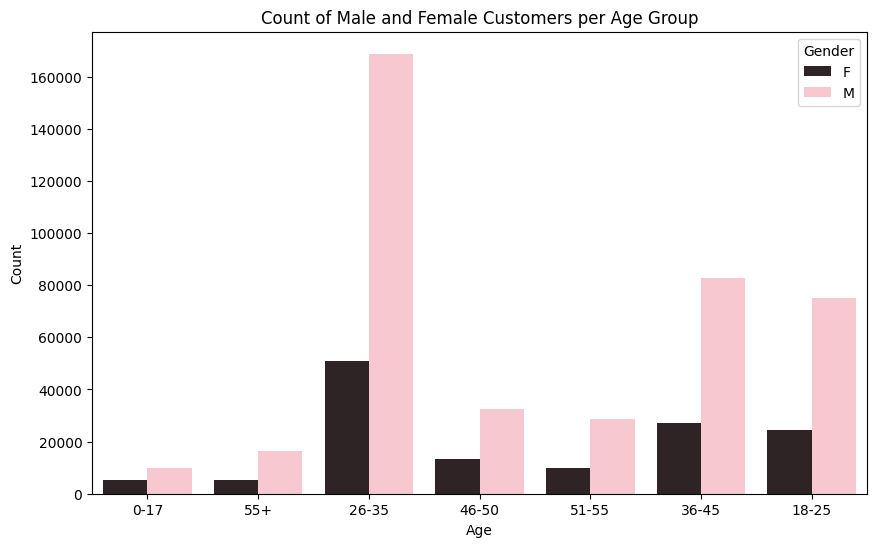

In [ ]:
age_gender_count = df.groupby(['Age', 'Gender'])
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', hue='Gender', color='pink')
plt.title('Count of Male and Female Customers per Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### **Insight:**

*   It is observed that for every age group, Walmart has a higher number of male customers compared to female customers.
*   A significant number of customers are aged between 26-35, contributing to majority of the income received.



## **Final Insights and Recommendations:**



*   It is statistically evident that Walmart has a large male customer base (75.3%) compared to female customers (24.7%)
*   The average spending on Black Friday for a population size of 100 million customers has been found out to range between 9246.5 - 9281.44.
*  For a population size of 50 million customers, male customers are found to have higher average spending (9417.11 - 9457.94) than female customers (8701.19 - 8767.94).
* It has also been observed that a majority of the customers at Walmart age between 26-35 years.

Based on these observations, the following action items can be implemented to maximize sales:

1. **Tailored Marketing Campaigns**
* **Targeted Ads for Men:** Since men tend to spend more, Walmart can run targeted advertising campaigns that focus on products and services that appeal specifically to male customers. These could include ads for high-ticket items like electronics, gadgets or apparel.

* **Targeted Email Marketing**: Using data-driven insights, Walmart can send personalized offers and product recommendations to customers based on their previous purchase patterns, leading to new purchases.



2. **Cross-Selling Strategies:**
*  Walmart can use cross-selling strategies by suggesting complementary items when  customers add  products to their cart.
* Example: When a customer purchases a laptop, Walmart could suggest related products such as laptop bags, headphones or other related accessories to encourage larger basket sizes.

3. **Exclusive Loyalty Perks for Shoppers:**
* Since men tend to spend more, Walmart can create loyalty programs specifically for male shoppers, offering rewards and benefits (such as exclusive early access to sales or discounts on high-value products) that appeal to their purchasing behavior.
* Example: Offer loyalty points or exclusive discounts for male customers who spend a certain amount during major shopping events like Black Friday.

4. **Seasonal Offers:**
* Walmart could introduce seasonal offers to attract more customers.
Example: Offer exclusive bundles for male shoppers with higher-value products during sales events.

5. **Geographic Segmentation:**
* Spending habits and patterns may vary by region. Walmart can use this insight to offer region-specific deals tailored to suit the market conditions of regions.
* Example: Create region-specific promotions based on popular products  in that area.

Additionally, the following action items can be implemented to increase sales among the female customers.

1. **Tailor Marketing Campaigns to Women:**
* **Highlight Women-Focused Products:** Walmart can run marketing campaigns that highlight products that appeal specifically to women, such as beauty and skincare products, fashion apparel, health and wellness.

* **Leverage Influencers and Celebrities:** Partner with female influencers, celebrities, or bloggers who align with Walmart’s brand and appeal to women. Influencers in areas like fashion, beauty, and lifestyle can create trust and inspire more women to shop at Walmart.


2. **Hosting Exclusive Events for Women:**
* **Women’s Shopping Events:** Walmart could host exclusive shopping events such as women’s wellness days, fashion showcases, or beauty product launches to attract female customers.
* Example: Organize a Beauty Day Event where women can attend beauty workshops or receive free skincare consultations while shopping for their favorite beauty products.


3. **Convenience in shopping:**

* **User-Friendly Website for Women:** Building a user-friendly interface that allows quick filtering for women’s categories such as clothing, accessories or home products.

* **Women-Focused Store Layouts:** Walmart can create well-organized sections in the store that are designed specifically for women’s needs, from fashion to beauty and wellness.




Adopting these data-driven strategies would support Walmart in increasing profitability and customer satisfaction during major sales events like Black Friday.


